# Example for the Metro Interstate Traffic Volume Dataset

https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

In [6]:
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_VISIBLE_DEVICES=1


In [32]:
import dill

import pandas as pd
import numpy as np

from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 2]

from IPython.display import clear_output

In [8]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2021-07-05 14:34:18.724179: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-07-05 14:34:18.727560: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-07-05 14:34:18.727622: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-07-05 14:34:18.727640: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-UFK4FP7): /proc/driver/nvidia/version does not exist


In [9]:
path = ' data_reduced.dill'

with open(path, 'rb') as f:
    data = dill.load(f)

In [12]:
X_test, y_test = data

In [14]:
X_test.shape, y_test.shape

((9626, 72, 12), (9626,))

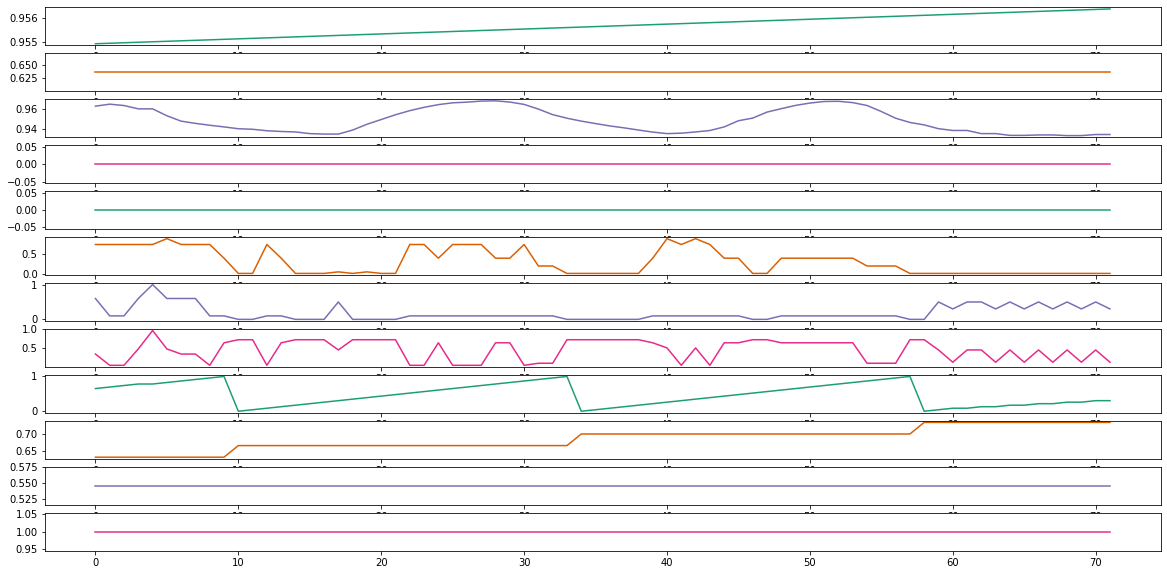

In [52]:
time_series_sample = X_test[0]
length, n_features = time_series_sample.shape

color_set = plt.cm.Dark2.colors[:4]

_, ax = plt.subplots(n_features, 1, figsize=(20, 10))
for i in range(n_features):
    ax[i].plot(time_series_sample[:, i], color=color_set[i % len(color_set)])

plt.show()

In [54]:
import os
import sys
sys.path.insert(0, './../../')

from tsmule.sampling.segment import MatrixProfileSegmentation, SAXSegmentation, WindowSegmentation
from tsmule.xai.viz import visualize_segmentation_mask